## This is a code that implements Nick's Fourier Transform to get the Kernel Function for the Barrier:

In [101]:
from scipy.special import kv as kv # Import Bessel Function
from scipy.integrate import quad # Import function to do the integral
from time import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [102]:
def integrand_ss(Y,y,x1,x2,b):
    '''y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1+Y**2)) 
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    return c1*c2
    
#def full_integral_ss(y,x1,x2,b):
#    '''The full Integral for samples on the same side.'''

def integrand_ds(Y,y,x1,x2,b):
    '''Integrand for sample on different sides of the Barrier'''
    c1 = 2 * np.cos(y*Y) / (np.sqrt(1 + Y**2) * (2 + b*np.sqrt(1 + Y**2)))
    c2 = np.exp(-np.abs(x1-x2) * np.sqrt(1+Y**2)) 
    return c1*c2
    
def bessel0(y,x1,x2):
    '''Give the Bessel Part of the decay.'''
    r = np.sqrt((x1-x2)**2 + y**2) # Calculates pairwise Distance
    return kv(0, r)                # Gives the Bessel Decay

In [192]:
def full_function(y, x1, x2, b):
    '''Gives the Fourier Transform of the Integrand.
    y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    if x1==x2 and y==0:  # In case of identical samples
        return 1.0
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return (bessel0(y,x1,x2) + quad(integrand_ss, 
                                       0, np.inf, args=(y, x1, x2, b)))[0]

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, np.inf, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral

In [120]:
#%timeit full_function(0.1,1,2,0.5)
print(full_function(0.1, 0.3, 0.4, 0.5))
%timeit full_function(0.1, 0.3, 0.4, 0.5)

2.26367256758
1000 loops, best of 3: 1.17 ms per loop


<IPython.core.display.Javascript object>


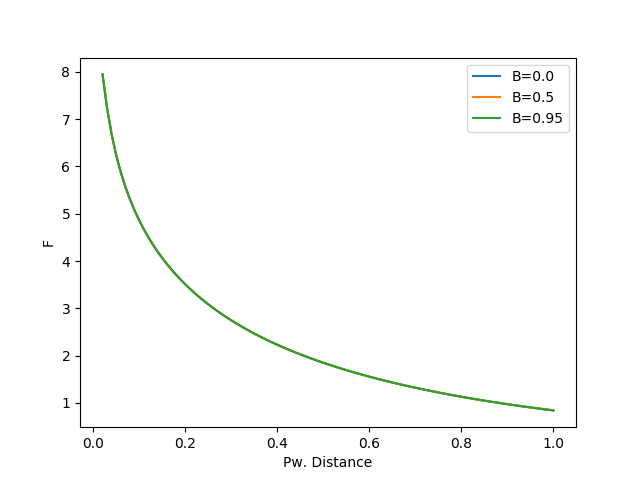

In [204]:
# Okay, now start the plotting action:
x_vec=np.linspace(0.02,1,100)
y = np.array([full_function(0.01, 0.01, x, b=0.0) for x in x_vec])
y1 = np.array([full_function(0.01, 0.01, x, b=0.5) for x in x_vec])
y2 = np.array([full_function(0.01, 0.01, x, b=0.95) for x in x_vec])

yb = np.array([full_function(0.01, -0.01, x, b=0.0) for x in x_vec])
yb1 = np.array([full_function(0.01, -0.01, x, b=0.5) for x in x_vec])
yb2 = np.array([full_function(0.01, -0.01, x, b=0.95) for x in x_vec])

# Do the Plotting
plt.figure()
plt.plot(x_vec, y + yb, label="B=0.0")
plt.plot(x_vec, y1 + yb1, label="B=0.5")
plt.plot(x_vec, y2 + yb2, label="B=0.95")


#plt.plot(x_vec,yb,label="B=0.0")
#plt.plot(x_vec,yb1,label="B=0.5")
#plt.plot(x_vec,yb2,label="B=0.95")

#plt.yscale('log')
plt.xlabel("Pw. Distance")
plt.ylabel("F")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


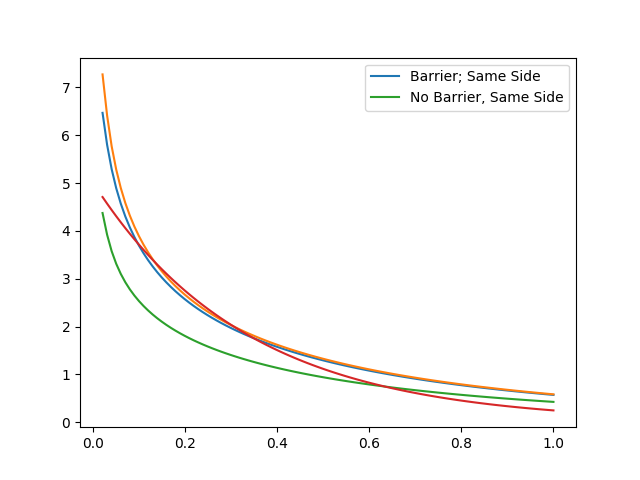

In [222]:
# Some more Sanity Checks:
x_vec=np.linspace(0.02,1,100)

y_no = np.array([full_function(0.01, 0.01, x, b=0) for x in x_vec])   # Samples K0
y_no_r = np.array([full_function(0.01, 0.01, x, b=0) for x in x_vec])  # Reflected Samples K0


y1 = np.array([full_function(0.01, -0.01, x, b=0.8) for x in x_vec])
y2 = np.array([full_function(0.01, 0.01, x, b=0.8) for x in x_vec])

plt.figure()
plt.plot(x_vec,y2,label="Barrier; Same Side")
plt.plot(x_vec,y_no + (y_no_r-y1))
plt.plot(x_vec,y_no, label="No Barrier, Same Side")
plt.legend()
plt.plot(x_vec, 5*np.exp(-(3*x_vec)))
plt.show()

In [134]:
# Some trial Cells:
def f(x,a):
    return 1.0/x**a

In [135]:
quad(f, 2, np.inf, args=(3))

(0.12499999999999997, 5.841441494062356e-10)

In [174]:
def calc_kernel_mat(coords, b):
    # Produce Full Covariance Matrix
    kernel=np.array([[full_function(i[1]-j[1], i[0], j[0], b) for i in coords] for j in coords])
    return kernel

X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') # Load the complete X-Data

print(np.size(X_data,0))

kernel=calc_kernel_mat(X_data,0.5)

500


In [201]:
#np.linalg.eigvals(kernel)
for i in range(np.size(kernel,0)):
    kernel[i,i]=0.25
np.max(kernel)

0.25

In [202]:
kernel[:3,:3]

array([[ 0.25      ,  0.11389387,  0.01115968],
       [ 0.11389387,  0.25      ,  0.11389387],
       [ 0.01115968,  0.11389387,  0.25      ]])

In [203]:
a=np.linalg.eigvals(kernel)
min(a)

-0.036285584581641335

In [194]:
full_function(0,0,0,0.5)

1.0